## EDA
Análisis Exploratorio de los Datos para la elección un Modelo de Clasificación de un Sistema de Recomendación de Peliculas por Similaridad

###  Estadística Descriptiva

In [1]:
# Se importan las bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import re

In [3]:
# Se ingesta el dataset preprocesado
df = pd.read_csv('ds_clean.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4497 non-null   object 
 1   budget                 45451 non-null  int64  
 2   genres                 43067 non-null  object 
 3   original_language      45440 non-null  object 
 4   overview               44510 non-null  object 
 5   popularity             45451 non-null  float64
 6   production_companies   33634 non-null  object 
 7   production_countries   39232 non-null  object 
 8   release_date           45451 non-null  object 
 9   revenue                45451 non-null  int64  
 10  runtime                45451 non-null  int64  
 11  spoken_languages       41554 non-null  object 
 12  status                 45371 non-null  object 
 13  tagline                20425 non-null  object 
 14  title                  45451 non-null  object 
 15  vo

### 2 Reducción de Dimensionalidad I

B) Criterio de eliminación por el tipo de información acerca de película:
Las variables no aportan información acerca de la naturaleza del contenido de cada película
Las variables no explican la similaridad de contenido entre las películas

In [ ]:
# Análisis de Correlación

df = df.drop('id', axis = 1)
data_num= df.select_dtypes(exclude = ['object'])
data_num.head(2)

correlation_matrix = data_num.corr()

plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [6]:
# Eliminación por el criterio B descrito lineas arriba
df = df.drop('revenue', axis = 1)
df = df.drop('release_year', axis = 1)
df = df.drop('release_date', axis = 1)
df = df.drop('budget', axis = 1)
df = df.drop('original_language', axis = 1)
df = df.drop('runtime', axis = 1)
df = df.drop('production_countries', axis = 1)
df = df.drop('spoken_languages', axis = 1)
df = df.drop('return', axis =1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4497 non-null   object 
 1   genres                 43067 non-null  object 
 2   overview               44510 non-null  object 
 3   popularity             45451 non-null  float64
 4   production_companies   33634 non-null  object 
 5   status                 45371 non-null  object 
 6   tagline                20425 non-null  object 
 7   title                  45451 non-null  object 
 8   vote_average           45451 non-null  float64
 9   vote_count             45451 non-null  float64
 10  cast                   43097 non-null  object 
 11  crew                   44728 non-null  object 
 12  director               44728 non-null  object 
dtypes: float64(3), object(10)
memory usage: 4.5+ MB


A) Criterio de eliminación por ratio de valores perdidos:
Proporción de entre valores NAN y el número de registros es menor a 0.02 o 2%

In [8]:
def filtrar_columnas_nulas(df):
    umbral_proporcion = 0.02
    num_filas = len(df)
    columnas_filtradas = []

    for columna in df.columns:
        if df[columna].isnull().sum() == 0:  # Las columnas que no tienen nulos se mantienen
            continue
        else:
            num_nulos = df[columna].isnull().sum()  # Se cuenta el número de nulos en la columna
            proporcion_nulos = num_nulos / num_filas

            if proporcion_nulos < umbral_proporcion:
                columnas_filtradas.append(columna)

    df.drop(columns=columnas_filtradas, inplace=True)  # Eliminar las columnas del dataframe

    print('Se filtraron las siguientes columnas:', columnas_filtradas)

    return df  # Retorna el dataframe actualizado

In [9]:
df = filtrar_columnas_nulas(df)

Se filtraron las siguientes columnas: ['status', 'crew', 'director']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4497 non-null   object 
 1   genres                 43067 non-null  object 
 2   overview               44510 non-null  object 
 3   popularity             45451 non-null  float64
 4   production_companies   33634 non-null  object 
 5   tagline                20425 non-null  object 
 6   title                  45451 non-null  object 
 7   vote_average           45451 non-null  float64
 8   vote_count             45451 non-null  float64
 9   cast                   43097 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.5+ MB


### 2 Estadistica Descriptiva

In [11]:
# Medidas de Tendencia central de variables numéricas
df.describe(include=[np.number])

,popularity,vote_average,vote_count
count,45451.000000,45451.000000,45451.000000
mean,2.926887,5.624085,109.989703
std,6.006458,1.915424,491.352336
min,0.000000,0.000000,0.000000
25%,0.389095,5.000000,3.000000
50%,1.131386,6.000000,10.000000
75%,3.694370,6.800000,34.000000
max,547.488298,10.000000,14075.000000


Esta tres variables podrían ser potencialmente redundantes

In [12]:
# Caraterísticas de las variables numéricas categóricas
df.describe(include=object)

,belongs_to_collection,genres,overview,production_companies,tagline,title,cast
count,4497,43067,44510,33634,20425,45451,43097
unique,1695,4064,44231,22666,20269,42195,42656
top,The Bowery Boys,Drama,No overview found.,Metro-Goldwyn-Mayer (MGM),Which one is the first to return - memory or t...,Blackout,Georges Méliès
freq,29,5006,133,742,9,13,24


### 3 Agrupación de datos y Tokenización

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

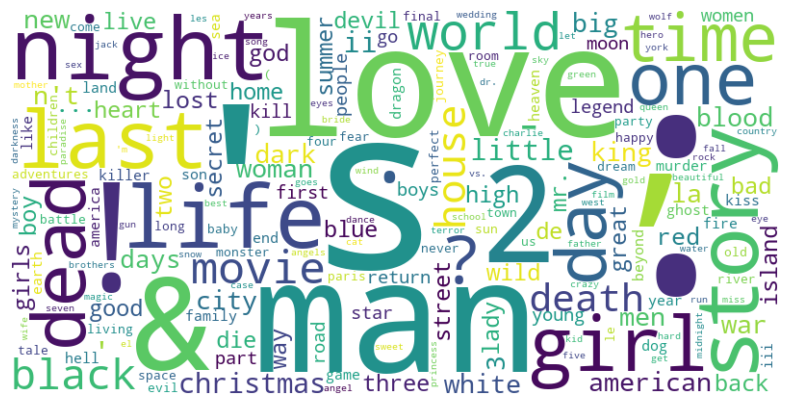

In [15]:
#### GENERAMOS UNA NUBE DE LAS PALABRAS MAS FRECUENTES EN LA COLUMNA 'title'

def generate_wordcloud(texts):
    # Get English prepositions
    stop_words = set(stopwords.words('english'))

    # Combine all the texts into a single string
    combined_text = ' '.join(str(text) for text in texts)

    # Tokenize the combined text into words
    words = word_tokenize(combined_text)

    # Filter out the prepositions
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]

    # Create a frequency distribution of the words
    freq_dist = nltk.FreqDist(filtered_words)

    # Create the word cloud with word frequencies as input
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Combine all the text from the 'title' column into a single list
all_text = df['title'].tolist()

# Apply the function to the combined text
generate_wordcloud(all_text)

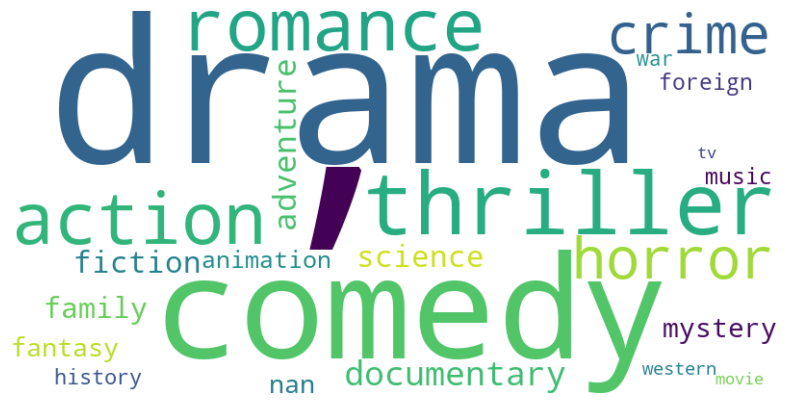

In [18]:
#### NUBE DE PALABRAS DE LA COLUMNA 'name_genres' QUE INDICA LOS GENEROS DE LAS PELICULAS

def generate_wordcloud(texts):
    # Get English prepositions
    stop_words = set(stopwords.words('english'))

    # Combine all the texts into a single string
    combined_text = ' '.join(str(text) for text in texts)

    # Tokenize the combined text into words
    words = word_tokenize(combined_text)

    # Filter out the prepositions
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]

    # Create a frequency distribution of the words
    freq_dist = nltk.FreqDist(filtered_words)

    # Create the word cloud with word frequencies as input
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Combine all the text from the 'title' column into a single list
all_text = df['genres'].tolist()

# Apply the function to the combined text
generate_wordcloud(all_text)

Las palabras más repetidas de title son: Love, man, girl, story, night, movie, girl, last, one, time, litle, house, death, american y day

Las palabras mas repetidas de genres son: drama, comedy

### 4 Reducción de dimensionalidad II

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4497 non-null   object 
 1   genres                 43067 non-null  object 
 2   overview               44510 non-null  object 
 3   popularity             45451 non-null  float64
 4   production_companies   33634 non-null  object 
 5   tagline                20425 non-null  object 
 6   title                  45451 non-null  object 
 7   vote_average           45451 non-null  float64
 8   vote_count             45451 non-null  float64
 9   cast                   43097 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.5+ MB


Reducción Vertical

In [19]:
# Se selecciona una sola variable de las tres por correlación(numericas)
variables = ['popularity', 'vote_average', 'vote_count']
df_selected = df[variables]
correlation_matrix = df_selected.corr()
print(correlation_matrix)

              popularity  vote_average  vote_count
popularity      1.000000      0.153814    0.559846
vote_average    0.153814      1.000000    0.123556
vote_count      0.559846      0.123556    1.000000


De las variables numericas, las tres indican una puntuación, dos de ellas tienen una correlación. Se va a conservar 'popularity' porque proviene de los datos extraidos de la cantidad de vistas . Sin embargo, los votos tienden a tener un sesgo, por la misma naturaleza de recolección

In [23]:
df = df.drop('vote_average', axis =1)
df = df.drop('vote_count', axis =1)

Reducción Horizontal

In [24]:
# Contar la frecuencia de cada película en la columna 'title'
peliculas_repetidas = df['title'].value_counts()
peliculas_repetidas

title
Blackout               13
Cinderella             11
Alice in Wonderland     9
Hamlet                  9
The Promise             8
                       ..
Svengali                1
Lampaansyöjät           1
Animal Kingdom          1
The Exploding Girl      1
Queerama                1
Name: count, Length: 42195, dtype: int64

In [25]:
# Filtrar las películas que se repiten
peliculas_repetidas = peliculas_repetidas[peliculas_repetidas > 1]
peliculas_repetidas

title
Blackout               13
Cinderella             11
Alice in Wonderland     9
Hamlet                  9
The Promise             8
                       ..
Lamerica                2
Buried Alive            2
The Hunting Party       2
The Rebel               2
Breakthrough            2
Name: count, Length: 2339, dtype: int64

In [26]:
# Obtener el número de películas repetidas
num_peliculas_repetidas = len(peliculas_repetidas)
num_peliculas_repetidas

2339

In [27]:
# Se borran los duplicados y se mantienen las primeras apariciones
df.drop_duplicates(subset='title', keep='first', inplace=True)

In [28]:
df['title']

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
45444            The Burkittsville 7
45445                Caged Heat 3000
45447            Century of Birthing
45449               Satan Triumphant
45450                       Queerama
Name: title, Length: 42195, dtype: object

In [29]:
# Verificar si hay películas repetidas
hay_repetidas = df['title'].duplicated().any()
if hay_repetidas:
    print("Hay películas repetidas en el dataframe.")
else:
    print("No hay películas repetidas en el dataframe.")

No hay películas repetidas en el dataframe.


En el contexto de reducción de variables categóricas, se identifica que la variable objetivo 'title' es crucial para el modelo de clasificación. Por lo tanto, se facilita el proceso de filtrado al eliminar directamente las filas que contienen valores repetidos en 'title'

### 5 Tratamiento de Outliers

En base a que solo hay uina variable numérica, 'popularity'. Se observará su comportamiento usando un histograma y un diagrama de dispersión.

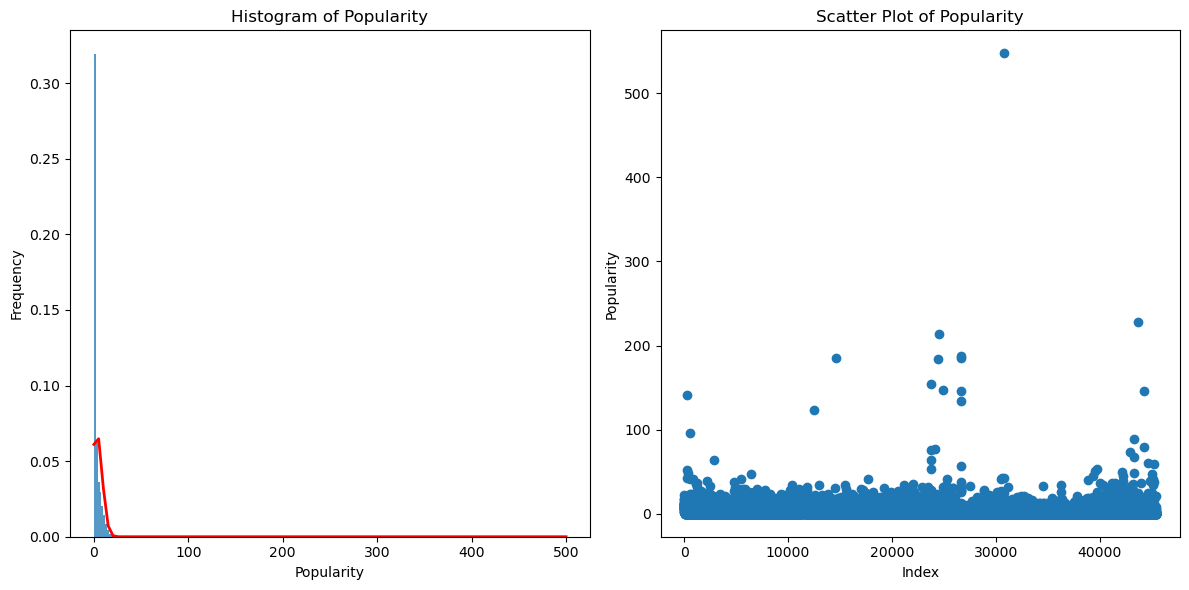

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Crear una figura con dos subtramas en la misma fila
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histograma
ax1.hist(df['popularity'], bins=50, range=(0, 100), density=True, alpha=0.75)
ax1.set_xlabel('Popularity')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Popularity')

# Generar los valores para la línea de la campana de Gauss
mu, sigma = df['popularity'].mean(), df['popularity'].std()
x = np.linspace(0, 500, 100)
y = norm.pdf(x, mu, sigma)  # Función de densidad de probabilidad

# Trazar la línea de la campana de Gauss
ax1.plot(x, y, 'r-', linewidth=2)

# Diagrama de dispersión
ax2.scatter(df.index, df['popularity'])
ax2.set_xlabel('Index')
ax2.set_ylabel('Popularity')
ax2.set_title('Scatter Plot of Popularity')

# Ajustar el espaciado entre las subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

Claramente se observa outliers. Se tienen que tratar para un análisis futuro

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42195 entries, 0 to 45450
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4356 non-null   object 
 1   genres                 39970 non-null  object 
 2   overview               41293 non-null  object 
 3   popularity             42195 non-null  float64
 4   production_companies   31186 non-null  object 
 5   tagline                19039 non-null  object 
 6   title                  42195 non-null  object 
 7   cast                   39957 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.9+ MB


## Factibilidad de posibles Modelos de Clasificación

##### Escenario Efectivo 
Se pueden usar los Vectores del Coseno usando las tres variables. Este enfoque es efectivo ya que aprovecha tanto la información textual como la numérica de las películas. Utilizar las características de texto permite capturar el contenido y el contexto de las películas, mientras que la característica numérica (popularidad) puede influir en las recomendaciones basadas en preferencias populares.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42195 entries, 0 to 45450
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                39970 non-null  object 
 1   overview              41293 non-null  object 
 2   popularity            42195 non-null  float64
 3   production_companies  31186 non-null  object 
 4   title                 42195 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.9+ MB


In [38]:
# Preprocesamiento del dataset para el modelo de clasificación 'ds_model.csv'
df = df.drop('tagline', axis =1)
df = df.drop('belongs_to_collection', axis = 1)
df = df.drop('cast', axis = 1)
df = df.drop('genres', axis = 1)
df = df.drop('production_companies', axis = 1)

In [40]:
#Exportamos el dataset "ds_model.csv"
df['overview'].fillna('Sin descripción', inplace=True)
df.to_csv('ds_model.csv', index=False)

#### Conclusiones
Las tres variables más reelevantes para el modelo de clasificación son las variables: "title", "overview" y "popularity"<br>
Las columnas "title", "overview" pueden ser combinadas y además ser usadas como BoW (bolsas de palabras) para modelos de clasificación. <br>
Los datos de la columna popularity tienen bastante dispersión y datos outliers, pero pueden ser usados como ultimo parámetro al momento de generar recomendaciones.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42195 entries, 0 to 45450
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   overview    42195 non-null  object 
 1   popularity  42195 non-null  float64
 2   title       42195 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.3+ MB
